In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [3]:

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create DataFrame for exploration
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Display basic info
print("Dataset Shape:", X.shape)
print("Classes:", iris.target_names)
df.head()

Dataset Shape: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)

Training set shape: (120, 4)
Testing set shape: (30, 4)


In [7]:
mlp = MLPClassifier(
    hidden_layer_sizes=(16, 8),  # Larger hidden layers for better capacity
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,    # Adjusted learning rate
    max_iter=1000,               # Increased iterations for convergence
    random_state=42,
    verbose=True                 # Show training progress
)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Check if model converged
print(f"Converged: {mlp.n_iter_ < mlp.max_iter}")
print(f"Training iterations: {mlp.n_iter_}")

Iteration 1, loss = 1.15837458
Iteration 2, loss = 1.15428774
Iteration 3, loss = 1.15027122
Iteration 4, loss = 1.14631714
Iteration 5, loss = 1.14246872
Iteration 6, loss = 1.13870753
Iteration 7, loss = 1.13503216
Iteration 8, loss = 1.13141984
Iteration 9, loss = 1.12788683
Iteration 10, loss = 1.12440832
Iteration 11, loss = 1.12098201
Iteration 12, loss = 1.11761438
Iteration 13, loss = 1.11429963
Iteration 14, loss = 1.11105691
Iteration 15, loss = 1.10785834
Iteration 16, loss = 1.10469138
Iteration 17, loss = 1.10155186
Iteration 18, loss = 1.09844530
Iteration 19, loss = 1.09541174
Iteration 20, loss = 1.09244314
Iteration 21, loss = 1.08947054
Iteration 22, loss = 1.08645066
Iteration 23, loss = 1.08341491
Iteration 24, loss = 1.08039040
Iteration 25, loss = 1.07738161
Iteration 26, loss = 1.07439277
Iteration 27, loss = 1.07140646
Iteration 28, loss = 1.06847392
Iteration 29, loss = 1.06555230
Iteration 30, loss = 1.06263027
Iteration 31, loss = 1.05974921
Iteration 32, los

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



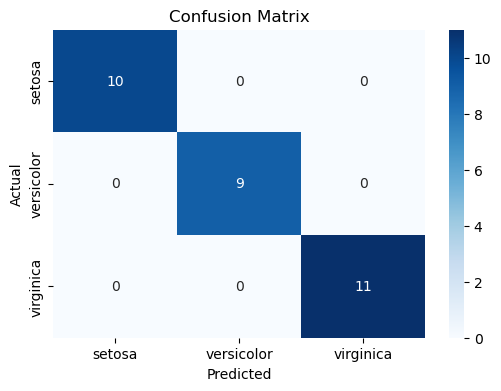

In [9]:
# Make predictions
y_pred = mlp.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

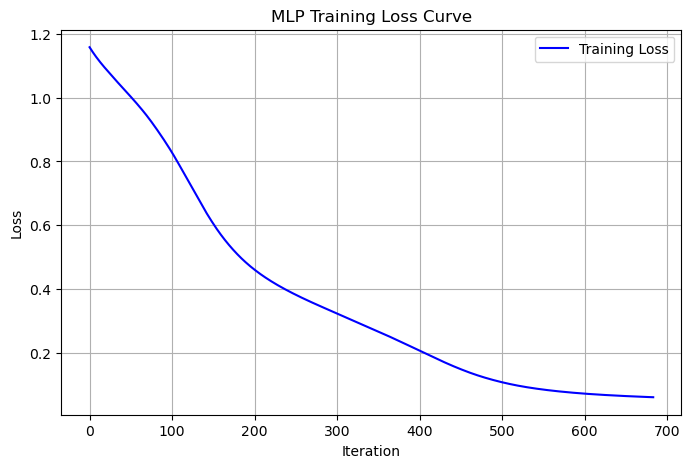

In [11]:
# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_, label='Training Loss', color='blue')
plt.title("MLP Training Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Probabilities for first 5 test samples:
Sample 1: [0.    0.991 0.009] -> Predicted: versicolor
Sample 2: [0.995 0.005 0.   ] -> Predicted: setosa
Sample 3: [0.    0.004 0.996] -> Predicted: virginica
Sample 4: [0.    0.957 0.043] -> Predicted: versicolor
Sample 5: [0.    0.951 0.049] -> Predicted: versicolor


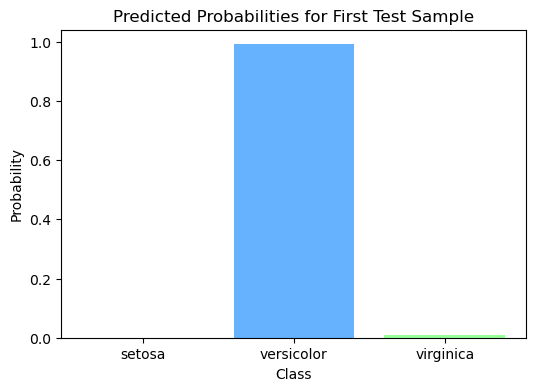

In [13]:
# Predict probabilities
probs = mlp.predict_proba(X_test_scaled)

# Display probabilities for first 5 test samples
print("\nProbabilities for first 5 test samples:")
for i in range(5):
    print(f"Sample {i+1}: {probs[i].round(3)} -> Predicted: {iris.target_names[y_pred[i]]}")

# Bar plot for first test sample probabilities
plt.figure(figsize=(6, 4))
plt.bar(iris.target_names, probs[0], color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title("Predicted Probabilities for First Test Sample")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

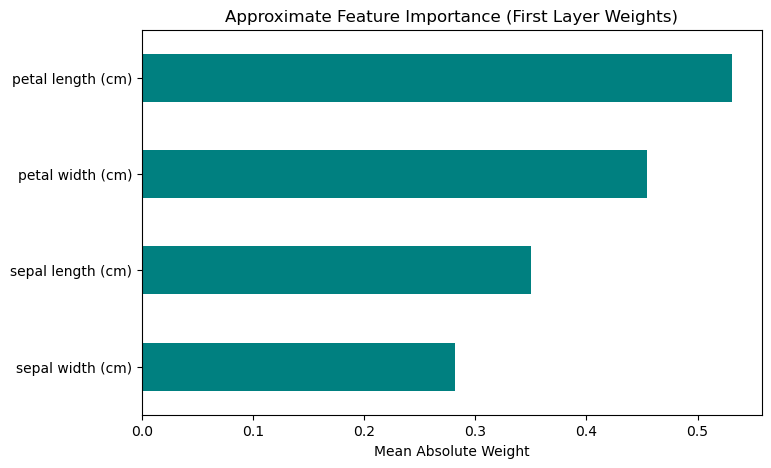

In [15]:
# Approximate feature importance using weights (simplified)
weights_first_layer = np.abs(mlp.coefs_[0]).mean(axis=1)
feature_importance = pd.Series(weights_first_layer, index=iris.feature_names)

# Plot feature importance
plt.figure(figsize=(8, 5))
feature_importance.sort_values().plot(kind='barh', color='teal')
plt.title("Approximate Feature Importance (First Layer Weights)")
plt.xlabel("Mean Absolute Weight")
plt.show()